# Проект. ВШЭ Центр непрерывного образования ФКН
Максимальная оценка за выполнение всех заданий - **8 баллов**.
Еще **от 0 до 2-х бонусных баллов** дается за совокупность креативных идей, изящность решения (читаемый код, написанный в небольшом объеме, например, использование функционала библиотек вместо простых циклов) и грамотного текстовго описания (этим считается все кроме кода).

Шаблоны кодов даны вам в качестве подсказок и верного направления. Так как это проект, вы можете не использовать эти шаблоны и двигаться в своем направлении.

**Итоговая максимальная оценка: 10 баллов**

## Регрессия

С 1 октября 2022 года отменяется НДС на бриллианты, что делает их новым инвестиционным инструментом. Давайте создадим для них модель ценообразования.

Загрузите набор данных Diamonds.csv.

Он одержит характеристики бриллиантов и их цены.

**Описание признаков**

* fluor - флуоресценция (свойство камня светиться под ультрафиолетом)
* symmetry - индикатор симметрии
* platform - название платформы, на которой был установлен драгоценный камень
* shape - фигура
* color - цвет
* clarity - прозрачность
* cut - качество огранки (может быть только для круглых камней)
* polish - полировка
* id - номер драгоценного камня
* date - дата
* price - цена
* carat - количество каратов
* tablepercent - size of the table compared to the width (не получается нормально перевести на русский)
* price_per_carat - цена за карат
* z - длина (диаметр)
* x - ширина
* depth_perc - соотношение высоты и ширины
* y - высота

**Добавленные пояснения**

Колонка 'Cut' - There are five cut grades: Excellent (EX), Very Good (VG), Good (G), Fair (F) and Poor (P).

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/ВШЭ интенсив/

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/ВШЭ интенсив/'
/content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
%matplotlib inline

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
#Размер датасета
df.shape

(222222, 18)

In [ ]:
df.sample(5)

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
166323,5492,FNT,G,jamesallen,CUSH,G,SI1,G,EX,804182,202205,5840.0,1.20,4866.67,6.58,5.88,65.0,3.82200
58289,374200,NONE,VG,jamesallen,HS,I,SI2,NaN,EX,14970785,202207,7270.0,1.56,4660.26,7.07,7.61,57.2,4.35292
27994,245606,FNT,EX,jamesallen,PS,H,IF,NaN,EX,14476766,202206,5440.0,1.01,5386.14,8.42,5.46,64.8,3.53808
12765,402757,NONE,EX,jamesallen,RD,K,VS2,EX,EX,15094842,202207,15560.0,2.08,7480.77,8.08,8.10,62.7,5.07870
5180,366993,NONE,VG,jamesallen,CUSH,E,SI1,G,EX,14941661,202207,11970.0,1.51,7927.15,6.55,6.25,68.6,4.28750


In [ ]:
df.describe()

,Unnamed: 0,id,date,price,carat,price_per_carat,z,x,depth_perc,y
count,222222.000000,2.222220e+05,222222.000000,2.222220e+05,222222.000000,222222.000000,222222.000000,222222.000000,222222.000000,222222.000000
mean,226825.890825,1.358831e+07,202202.404627,1.171520e+04,1.342990,7034.908535,7.083479,6.423990,64.086827,4.097854
std,130806.679472,2.548511e+06,857.882625,2.540339e+04,0.724063,5216.446801,1.377311,1.046289,4.200656,0.599385
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113430.500000,1.359865e+07,202205.000000,4.210000e+03,1.000000,4148.510000,6.260000,5.690000,61.800000,3.811500
50%,226950.500000,1.440046e+07,202206.000000,6.560000e+03,1.010000,5851.490000,6.530000,6.380000,63.000000,3.998400
75%,339880.750000,1.483763e+07,202207.000000,1.160000e+04,1.500000,8609.270000,7.660000,6.820000,66.000000,4.322500
max,453631.000000,1.541851e+07,202207.000000,2.380380e+06,21.170000,955000.000000,21.880000,18.050000,78.000000,10.739750


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222222 entries, 0 to 222221
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       222222 non-null  int64  
 1   fluor            222207 non-null  object 
 2   symmetry         222218 non-null  object 
 3   platform         222218 non-null  object 
 4   shape            222218 non-null  object 
 5   color            222218 non-null  object 
 6   clarity          222218 non-null  object 
 7   cut              148981 non-null  object 
 8   polish           222218 non-null  object 
 9   id               222222 non-null  int64  
 10  date             222222 non-null  int64  
 11  price            222222 non-null  float64
 12  carat            222222 non-null  float64
 13  price_per_carat  222222 non-null  float64
 14  z                222222 non-null  float64
 15  x                222222 non-null  float64
 16  depth_perc       222222 non-null  floa

In [ ]:
# Ищем столбцы с константами
df.nunique()[df.nunique() <= 2]

platform    1
dtype: int64

In [ ]:
df['platform'].value_counts(normalize = 'true', dropna = False)

jamesallen    0.999982
NaN           0.000018
Name: platform, dtype: float64

In [ ]:
# Проверка правильности расчета 'price' и 'price_per_carat'
rate = df['price'] / (df['price_per_carat'] * df['carat'])
print('Количество уникальных строк:', df[round(abs(rate), 1) < 1.05].index.nunique(), 'из', df.shape[0], 'строк')
rate_set = set(list(abs(rate)))
print('Минимальное соотношение:', round(min(rate_set), 6), ', максимальное соотношение:', round(max(rate_set), 6))
print('Выбросов нет.')

Количество уникальных строк: 222218 из 222222 строк
Минимальное соотношение: 0.999996 , максимальное соотношение: 1.000004
Выбросов нет.


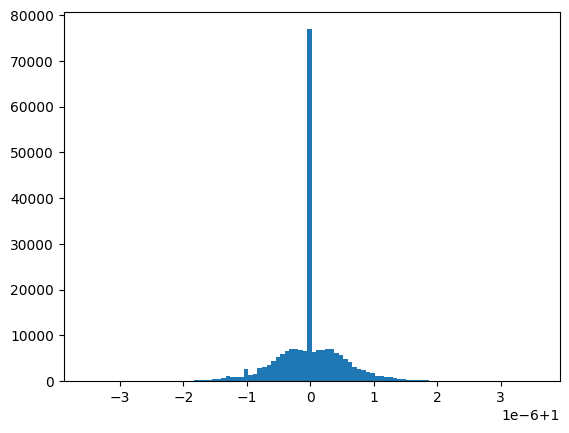

In [ ]:
plt.hist(rate, bins = 100)
plt.show()

In [ ]:
# Смотрим на корреляцию признаков
df.corr()

<ipython-input-27-47dc81e8ae75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,id,date,price,carat,price_per_carat,z,x,depth_perc,y
Unnamed: 0,1.000000,0.688429,0.003110,-0.036641,-0.054759,0.002122,0.002192,0.018771,-0.076828,-0.011258
id,0.688429,1.000000,0.022708,-0.074289,-0.104731,-0.049217,-0.034138,-0.026434,-0.078079,-0.063285
date,0.003110,0.022708,1.000000,0.001986,0.007891,0.005764,0.021851,0.026081,0.064741,0.029048
price,-0.036641,-0.074289,0.001986,1.000000,0.769237,0.759962,0.480009,0.555031,-0.059963,0.585460
carat,-0.054759,-0.104731,0.007891,0.769237,1.000000,0.600310,0.706930,0.742296,-0.004330,0.822466
price_per_carat,0.002122,-0.049217,0.005764,0.759962,0.600310,1.000000,0.434722,0.595942,-0.164597,0.590350
z,0.002192,-0.034138,0.021851,0.480009,0.706930,0.434722,1.000000,0.471043,-0.252627,0.420989
x,0.018771,-0.026434,0.026081,0.555031,0.742296,0.595942,0.471043,1.000000,-0.434057,0.923371
depth_perc,-0.076828,-0.078079,0.064741,-0.059963,-0.004330,-0.164597,-0.252627,-0.434057,1.000000,-0.061463
y,-0.011258,-0.063285,0.029048,0.585460,0.822466,0.590350,0.420989,0.923371,-0.061463,1.000000


In [ ]:
# Удаляем колонки с не информативными данными и слабокоррелирующие технические данные с целевой переменной:
# 'Unnamed: 0' - что-то похожее на id
# id - номер драгоценного камня (ПОКА ОСТАВЛЯЕМ)
# price - цена
# platform - т.к. лишь одно уникальное значение, а пропусков менее 0,0018 %
# depth_perc: поскольку (y / x) * 100 = depth_perc
df.drop(columns=['Unnamed: 0', 'price', 'platform', 'z', 'x', 'y', 'depth_perc'], axis= 1 , inplace= True )

In [ ]:
# Проверка на дубликаты
df.duplicated().sum()

2544

In [ ]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219678 entries, 0 to 222221
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fluor            219666 non-null  object 
 1   symmetry         219677 non-null  object 
 2   shape            219677 non-null  object 
 3   color            219677 non-null  object 
 4   clarity          219677 non-null  object 
 5   cut              147594 non-null  object 
 6   polish           219677 non-null  object 
 7   id               219678 non-null  int64  
 8   date             219678 non-null  int64  
 9   carat            219678 non-null  float64
 10  price_per_carat  219678 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 20.1+ MB


In [ ]:
# Исследуем колонку 'Cut'
print(df['cut'].unique())
print(df['cut'].value_counts(normalize = 'true', dropna = False))

[nan 'EX' 'VG' 'G']
EX     0.471690
NaN    0.328135
VG     0.164127
G      0.036048
Name: cut, dtype: float64


In [ ]:
# Nan-ов почти 33% . Предлагаю залить их значением 'F' - Fair (более низкое качество огранки)
df['cut'] = df['cut'].fillna('F')

In [ ]:
# Поскольку строк с Nan не много (за исключением колонки 'Cut'), предлагаю их дропнуть.
df.dropna(inplace = True)

In [ ]:
# Проверка колонок на нули (или пустоту)
df.isnull().any()

fluor              False
symmetry           False
shape              False
color              False
clarity            False
cut                False
polish             False
id                 False
date               False
carat              False
price_per_carat    False
dtype: bool

In [ ]:
# Проверка колонок на пропуски
df.isna().any()

fluor              False
symmetry           False
shape              False
color              False
clarity            False
cut                False
polish             False
id                 False
date               False
carat              False
price_per_carat    False
dtype: bool

count    219666.000000
mean       7005.914213
std        5126.878887
min        1029.700000
25%        4147.060000
50%        5850.000000
75%        8592.882500
max      955000.000000
Name: price_per_carat, dtype: float64
Axes(0.125,0.11;0.775x0.77)


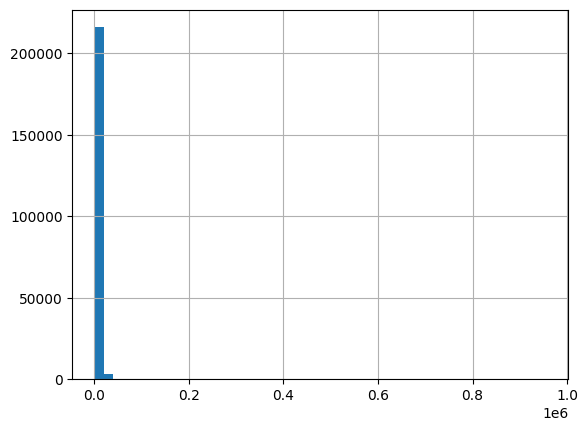

In [ ]:
# Цена за карат
print(df['price_per_carat'].describe())
print(df['price_per_carat'].hist(bins=50))

In [ ]:
import scipy.stats as stats

In [ ]:
# Подсчет количества выбросов
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df['price_per_carat']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
#data_clean = df[(z<3.0)]
bad_indices = df['price_per_carat'][(z > 3.0)].index

#find how many rows are left in the dataframe
#data_clean.shape
bad_indices.shape[0]

2591

In [ ]:
# Удаление выбросов
df = df.drop(bad_indices)

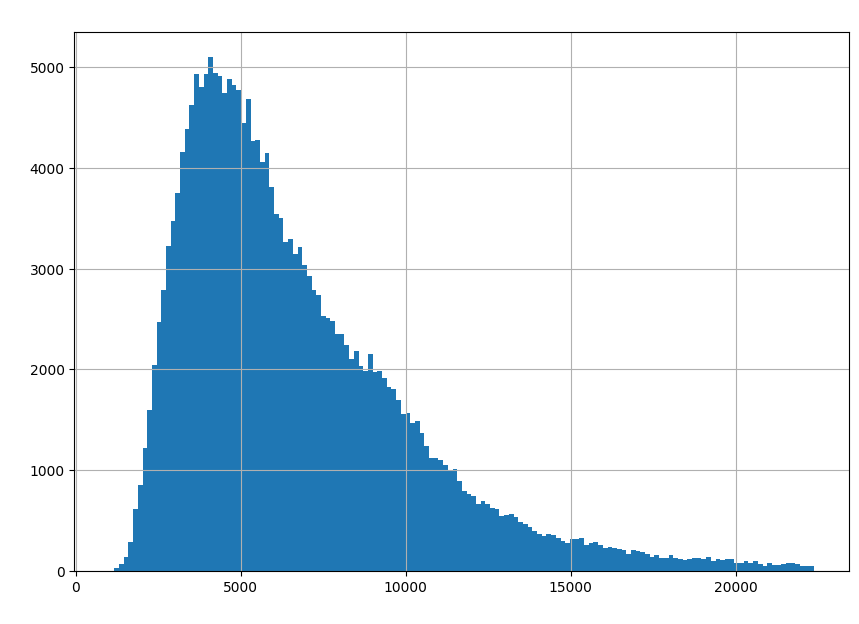

In [ ]:
plt.figure(figsize=(10,7))
plt.title(' ')
plt.xlabel(' ')
plt.ylabel(' ')
df['price_per_carat'].hist(bins=150)
plt.show()

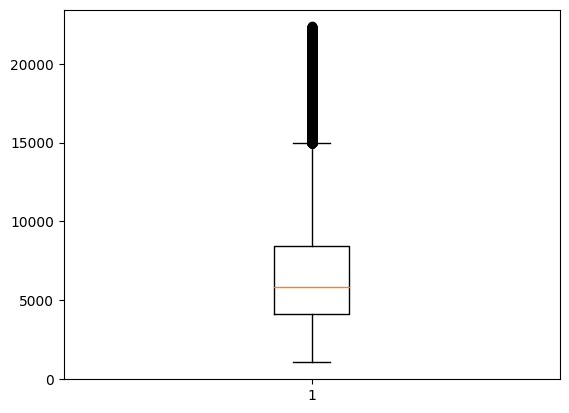

In [ ]:
plt.boxplot(df['price_per_carat'])['caps'][1].get_ydata()[0]
plt.show()

Необходимо спрогнозировать `price_per_carat`

### Задание 1: Очистка (2 балла)

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

**Попробуйте найти аномалии:** вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
"""id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней

# разделите выборку на две части

df_one = df.query('carat == 1') # те драгоценные камни, которые встретились 1 раз
df_three = df.query('carat >= 2 and carat <= 3') # те драгоценные камни, которые встсретились 2-3 раза

stat = df_three.groupby('id').agg({'price_per_carat': np.std}) # Посчитайте стандартное отклонение по нескольким полям,
# подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах

# Удалите аномальные наблюдения
df_three = df_three.query('...').sort_values(by=['id','date'])

df_three = df_three.groupby('...').agg('l...').reset_index() # тепреь в качестве цены возьмем последнее значение по времени

df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты"""

"id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней\n\n# разделите выборку на две части\n\ndf_one = df.query('carat == 1') # те драгоценные камни, которые встсретились 1 раз\ndf_three = df.query('carat >= 2 and carat <= 3') # те драгоценные камни, которые встсретились 2-3 раза\n\nstat = df_three.groupby('id').agg({'price_per_carat': np.std}) # Посчитайте дстандартное отклонение по нескольким полям,\n# подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах\n\n# Удалите аномальные наблюдения\ndf_three = df_three.query('...').sort_values(by=['id','date'])\n\ndf_three = df_three.groupby('...').agg('l...').reset_index() # тепреь в качестве цены возьмем последнее значение по времени\n\ndf = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты"

In [ ]:
# Преобразуем дату в тип date
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217075 entries, 0 to 222221
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   fluor            217075 non-null  object        
 1   symmetry         217075 non-null  object        
 2   shape            217075 non-null  object        
 3   color            217075 non-null  object        
 4   clarity          217075 non-null  object        
 5   cut              217075 non-null  object        
 6   polish           217075 non-null  object        
 7   id               217075 non-null  int64         
 8   date             217075 non-null  datetime64[ns]
 9   carat            217075 non-null  float64       
 10  price_per_carat  217075 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 19.9+ MB


In [ ]:
# Чтобы посчитать статистику по количеству камней, использую метод groupby() и count().
# Затем преобразую результат в DataFrame с помощью to_frame()
id_stat = df.groupby(by='id')['carat'].count().to_frame()
id_stat.query('carat > 1')

,carat
id,
19423,3
19449,2
19501,3
19504,2
19505,2
...,...
15159825,2
15159829,2
15159840,2


In [ ]:
# Чтобы разделить выборку на две части, используем метод query() с условием для каждой части
df_one = df.query('carat == 1')
df_three = df.query('carat >= 2 and carat <= 3')

In [ ]:
# Чтобы посчитать стандартное отклонение по нескольким полям для каждого идентификатора, использую метод groupby() и agg() с функцией np.std:
stat = df_three.groupby('id').agg({'price_per_carat': np.std})
stat

,price_per_carat
id,
19501,415.692194
19504,0.000000
19505,404.564074
19507,379.673915
19510,NaN
...,...
15410722,NaN
15412729,NaN
15417909,NaN


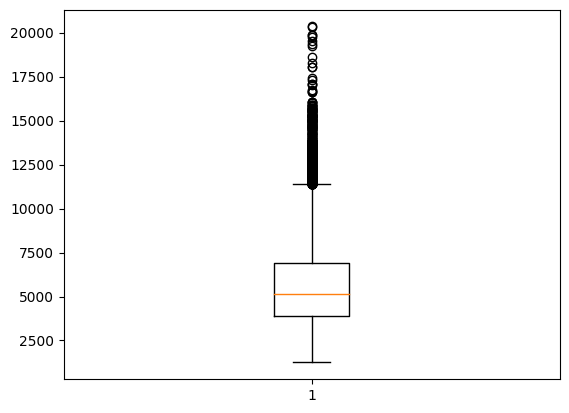

In [ ]:
# Чтобы удалить аномальные наблюдения,использую метод boxplot
import matplotlib.pyplot as plt
upper_whisker = plt.boxplot(df_one['price_per_carat'])['caps'][1].get_ydata()[0]
df_one = df_one[df_one['price_per_carat'] <= upper_whisker]

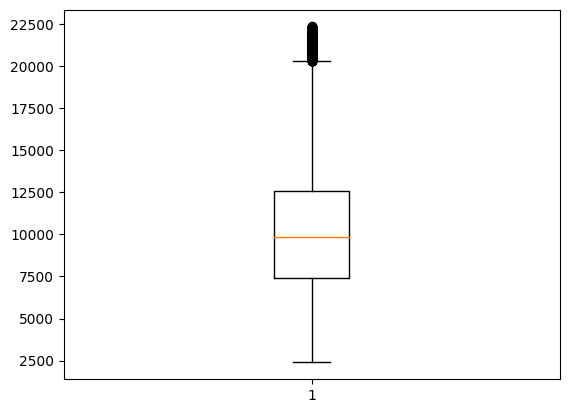

In [ ]:
upper_whisker = plt.boxplot(df_three['price_per_carat'])['caps'][1].get_ydata()[0]
df_three = df_three[df_three['price_per_carat'] <= upper_whisker]

In [ ]:
# в качестве цены возьмем последнее значение по времени
df_one = df_one.groupby('id').agg({'price_per_carat': 'last'}).reset_index()
df_three = df_three.groupby('id').agg({'price_per_carat': 'last'}).reset_index()
df_one
df_three

,id,price_per_carat
0,19501,18210.00
1,19504,11512.44
2,19505,13920.40
3,19507,13576.35
4,19510,12931.37
...,...,...
16327,15410722,17457.71
16328,15412729,8990.00
16329,15417909,8000.00
16330,15417910,8358.21


In [ ]:
# объединенный датафрейм
df2 = pd.concat([df_one, df_three]).reset_index(drop=True)
df2

,id,price_per_carat
0,19599,5410.00
1,21680,5700.00
2,22108,6230.00
3,22233,6180.00
4,22310,5930.00
...,...,...
53287,15410722,17457.71
53288,15412729,8990.00
53289,15417909,8000.00
53290,15417910,8358.21


Цены на бриллианты достаточно сильно меняются, попробуйте вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

*Определите эти группы и рассчитайте коэффициенты инфляции для каждой из них. Подправьте цены на эти коэффициенты и создайте новую переменную.*

In [ ]:
categories = ['carat'] #  #определите по каким группам отпределять инфляцию (к примеру можно добавить каратную группу)

df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index() # индекс цен
date_max = df_index.date.max()
df_index = df_index.merge(df_index.query('date == @date_max')[categories + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max'}),
                          on=categories, how='outer') # сопоставляем группы с максимальной датой
df_index['inflation'] = df_index['price_per_carat_max'] / df_index.price_per_carat # расчет инфляции

df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']], on=['date'] + categories, how='left') # объединить все в одну таблицу
df_with_inf

,fluor,symmetry,shape,color,clarity,cut,polish,id,date,carat,price_per_carat,inflation
0,NONE,EX,PS,F,SI1,F,EX,13870838,1970-01-01 00:00:00.000202206,1.55,8290.32,1.046360
1,MED,EX,RD,H,VVS2,EX,EX,11725253,1970-01-01 00:00:00.000202207,1.02,7362.75,1.000000
2,NONE,EX,EM,H,IF,F,EX,14444347,1970-01-01 00:00:00.000202205,2.01,10557.21,1.033244
3,NONE,EX,RD,E,VS2,EX,EX,14438434,1970-01-01 00:00:00.000202207,1.00,8660.00,1.000000
4,NONE,VG,RD,F,VS1,VG,EX,14615276,1970-01-01 00:00:00.000202206,1.00,8480.00,1.035491
...,...,...,...,...,...,...,...,...,...,...,...,...
217070,NONE,EX,RD,D,VS2,EX,EX,7535786,1970-01-01 00:00:00.000202207,0.97,8969.07,1.000000
217071,NONE,EX,RD,D,VS2,EX,EX,14631732,1970-01-01 00:00:00.000202206,0.90,7388.89,1.029602
217072,NONE,EX,RD,J,SI2,EX,EX,13932645,1970-01-01 00:00:00.000202205,1.52,7611.84,1.044335
217073,STG,EX,RD,G,VS1,EX,EX,12699310,1970-01-01 00:00:00.000202207,1.09,7541.28,1.000000


In [ ]:
df_with_inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217075 entries, 0 to 217074
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   fluor            217075 non-null  object        
 1   symmetry         217075 non-null  object        
 2   shape            217075 non-null  object        
 3   color            217075 non-null  object        
 4   clarity          217075 non-null  object        
 5   cut              217075 non-null  object        
 6   polish           217075 non-null  object        
 7   id               217075 non-null  int64         
 8   date             217075 non-null  datetime64[ns]
 9   carat            217075 non-null  float64       
 10  price_per_carat  217075 non-null  float64       
 11  inflation        216968 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 21.5+ MB


### Task 2: Модели (6 баллов)

Определите функцию потерь (MSE или MAE) и обоснуйте свой выбор. Постарайтесь установить базовый уровень (baseline). Используйте LabelEncoder для категориальных функций и **создайте линейную модель.**

In [ ]:
# Разделим данные на признаки и таргет
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

X = df.drop(columns=["price_per_carat", "id", "date"])
y = df["price_per_carat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) #stratify=y

**в идеале можно пояснить почему удаляем еще признаки**

Теперь попробуйте OHE (One Hot Encoding) или TargetEncoder (сравните их).

Нормализуйте данные.

Поработайте с пропущенными значениями (обратите внимание, что для «fluor» значение может отсутствовать или значение может быть пустым).

Покажите, насколько вам удалось улучшить результат.

In [ ]:
! pip install category_encoders

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List

In [ ]:
#def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    """
    Вместо этой функции вы можете использовать функционал Pandas.
    """
    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

scaler = StandardScaler()

In [ ]:
# Закодируем OHE категориальные признаки. Для этого воспользуемся функцией get_dummies библиотеки pandas
df = pd.get_dummies(
    df,
    columns=['fluor', 'symmetry', 'shape', 'color', 'clarity', 'cut', 'polish'],
    drop_first=True
)

In [ ]:
# Посмотрим какого типа у нас в итоге колонки. Например при помощи метода .select_dtypes(object)
df.select_dtypes(object)

In [ ]:
# Поскольку модели работать с типом данных object не могут, конвертируем все столбцы в тип float
df = df.astype(float)

In [ ]:
X_train.describe()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [ ]:
from sklearn.linear_model import LinearRegression

# Создадим эуземпляр класса LinearRegression без параметров
model_lr = LinearRegression()

# Обучим модель
model_lr.fit(X_train, y_train)
# Сделаем предсказание на тестовой выборкe
y_pred_lr = model_lr.predict(X_test)

In [ ]:
MAX_ERROR_lr = round(max_error(y_test, y_pred_lr), 2)
MAE_lr = round(mean_absolute_error(y_test, y_pred_lr), 2)
MSE_lr = round(mean_squared_error(y_test, y_pred_lr), 2)
RMSE_lr = round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 2)
R2_lr = round(r2_score(y_test, y_pred_lr), 4)
MAPE_lr = round(mean_absolute_percentage_error(y_test, y_pred_lr), 4)

print("TEST")
print(f"MAX ERROR: {MAX_ERROR_lr}")
print(f"MAE:       {MAE_lr}")
print(f"MSE:       {MSE_lr}")
print(f"RMSE:      {RMSE_lr}")
print(f"R2:        {R2_lr}")
print(f"MAPE:      {MAPE_lr}")

TEST
MAX ERROR: 21847.08
MAE:       1031.8
MSE:       2147139.1
RMSE:      1465.31
R2:        0.8257
MAPE:      0.1792


In [ ]:
np.divide(mean_absolute_error(y_test, y_pred_lr), y.mean())
np.divide(np.sqrt(mean_squared_error(y_test, y_pred_lr)), y.mean())

0.2265778231079676

Сравните результаты вашей модели с результатами KNN.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Создадим экземпляр класса KNeighborsRegressor с числом ближайших соседей (n_neighbors) равным 3
model_knn = KNeighborsRegressor(n_neighbors = 3)

# Обучим модель
model_knn.fit(X_train, y_train)
# Сделаем предсказание на тестовой выборке
y_pred_knn = model_knn.predict(X_test)

In [ ]:
MAX_ERROR_knn = round(max_error(y_test, y_pred_knn), 2)
MAE_knn = round(mean_absolute_error(y_test, y_pred_knn), 2)
MSE_knn = round(mean_squared_error(y_test, y_pred_knn), 2)
RMSE_knn = round(np.sqrt(mean_squared_error(y_test, y_pred_knn)), 2)
R2_knn = round(r2_score(y_test, y_pred_knn), 4)
MAPE_knn = round(mean_absolute_percentage_error(y_test, y_pred_knn), 4)

print("TEST")
print(f"MAX ERROR: {MAX_ERROR_knn}")
print(f"MAE:       {MAE_knn}")
print(f"MSE:       {MSE_knn}")
print(f"RMSE:      {RMSE_knn}")
print(f"R2:        {R2_knn}")
print(f"MAPE:      {MAPE_knn}")

TEST
MAX ERROR: 13208.42
MAE:       617.66
MSE:       961287.09
RMSE:      980.45
R2:        0.922
MAPE:      0.1015


In [ ]:
np.divide(mean_absolute_error(y_test, y_pred_knn), y.mean())
np.divide(np.sqrt(mean_squared_error(y_test, y_pred_knn)), y.mean())

0.16858323947078155

**1.5 баллов за правильные кодировки, сравнения и KNN**

## Деревья решений (2 балла)

Попробуйте выполнить ту же задачу, но используя модель дерева решений.

In [ ]:
# Импортируем класс DecisionTreeRegressor из модуля tree библиотеки sklear
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Создадим объект класса DecisionTreeRegressor с параметрами по умолчанию
DTR = DecisionTreeRegressor(max_depth=7)

# Обучим его на обучающей части датасета при помощи метода fit
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [ ]:
# Получим предсказание нашего дерева при помощи метода predict на обучающем и тестовом датасете
y_DTR_train_predict = DTR.predict(X_train)
y_DTR_test_predict = DTR.predict(X_test)

In [ ]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
MAX_ERROR_DTR = round(max_error(y_test, y_DTR_test_predict), 2)
MAE_DTR = round(mean_absolute_error(y_test, y_DTR_test_predict), 2)
MSE_DTR = round(mean_squared_error(y_test, y_DTR_test_predict), 2)
RMSE_DTR = round(np.sqrt(mean_squared_error(y_test, y_DTR_test_predict)), 2)
R2_DTR = round(r2_score(y_test, y_DTR_test_predict), 4)
MAPE_DTR = round(mean_absolute_percentage_error(y_test, y_DTR_test_predict), 4)

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_DTR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_DTR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {MAX_ERROR_DTR}")
print(f"MAE:       {MAE_DTR}")
print(f"MSE:       {MSE_DTR}")
print(f"RMSE:      {RMSE_DTR}")
print(f"R2:        {R2_DTR}")
print(f"MAPE:      {MAPE_DTR}")

TRAIN
MAX ERROR: 14097.296822479464
MAE:       1305.3554941911768
TEST
MAX ERROR: 12930.92
MAE:       1325.19
MSE:       3706581.19
RMSE:      1925.25
R2:        0.6991
MAPE:      0.2113


In [ ]:
np.divide(mean_absolute_error(y_test, y_DTR_test_predict), y.mean())
np.divide(np.sqrt(mean_squared_error(y_test, y_DTR_test_predict)), y.mean())

0.28378575682679924

Подбор параметров при помощи GridSearchCV

In [ ]:
# Импортируем GridSearchCV из модуля model_selection библиотеки sklearn
from sklearn.model_selection import GridSearchCV

In [ ]:
# Воспользуем функцией GridSearchCV
# В качестве определения "лучшей" модели выберем mean_absolute_error

grid = GridSearchCV(
            DecisionTreeRegressor(),                # Алгоритм, в котором будем подбирать параметры
            param_grid = {                          # Сетка параметров в виде словаря
                'max_depth': range(1, 8),
                'min_samples_leaf': range(1, 8),
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться (Почему "neg_..."?)
            cv = 4,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid.fit(X_train, y_train)

Fitting 4 folds for each of 49 candidates, totalling 196 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=5)

In [ ]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику
print(f"Лучшая метрика:   {grid.best_score_}")
print(f"Лучшие параметры: {grid.best_params_}")

Лучшая метрика:   -1307.3181687323208
Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 4}


In [ ]:
# Получим предсказание нашего лучшего дерева (хранится в best_estimator_) при помощи метода predict на обучающем и тестовом датасете
y_GS_train_predict = grid.best_estimator_.predict(X_train)
y_GS_test_predict = grid.best_estimator_.predict(X_test)

In [ ]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
MAX_ERROR_GS = round(max_error(y_test, y_GS_test_predict), 2)
MAE_GS = round(mean_absolute_error(y_test, y_GS_test_predict), 2)
MSE_GS = round(mean_squared_error(y_test, y_GS_test_predict), 2)
RMSE_GS = round(np.sqrt(mean_squared_error(y_test, y_GS_test_predict)), 2)
R2_GS = round(r2_score(y_test, y_GS_test_predict), 4)
MAPE_GS = round(mean_absolute_percentage_error(y_test, y_GS_test_predict), 4)

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_GS_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_GS_train_predict)}")
print("TEST")
print(f"MAX ERROR: {MAX_ERROR_GS}")
print(f"MAE:       {MAE_GS}")
print(f"MSE:       {MSE_GS}")
print(f"RMSE:      {RMSE_GS}")
print(f"R2:        {R2_GS}")
print(f"MAPE:      {MAPE_GS}")

TRAIN
MAX ERROR: 14097.296822479455
MAE:       1305.363734368953
TEST
MAX ERROR: 12930.92
MAE:       1325.22
MSE:       3706718.48
RMSE:      1925.28
R2:        0.6991
MAPE:      0.2113


In [ ]:
# Импортируем функцию plot_tree из модуля tree библиотеки sklearn
from sklearn.tree import plot_tree

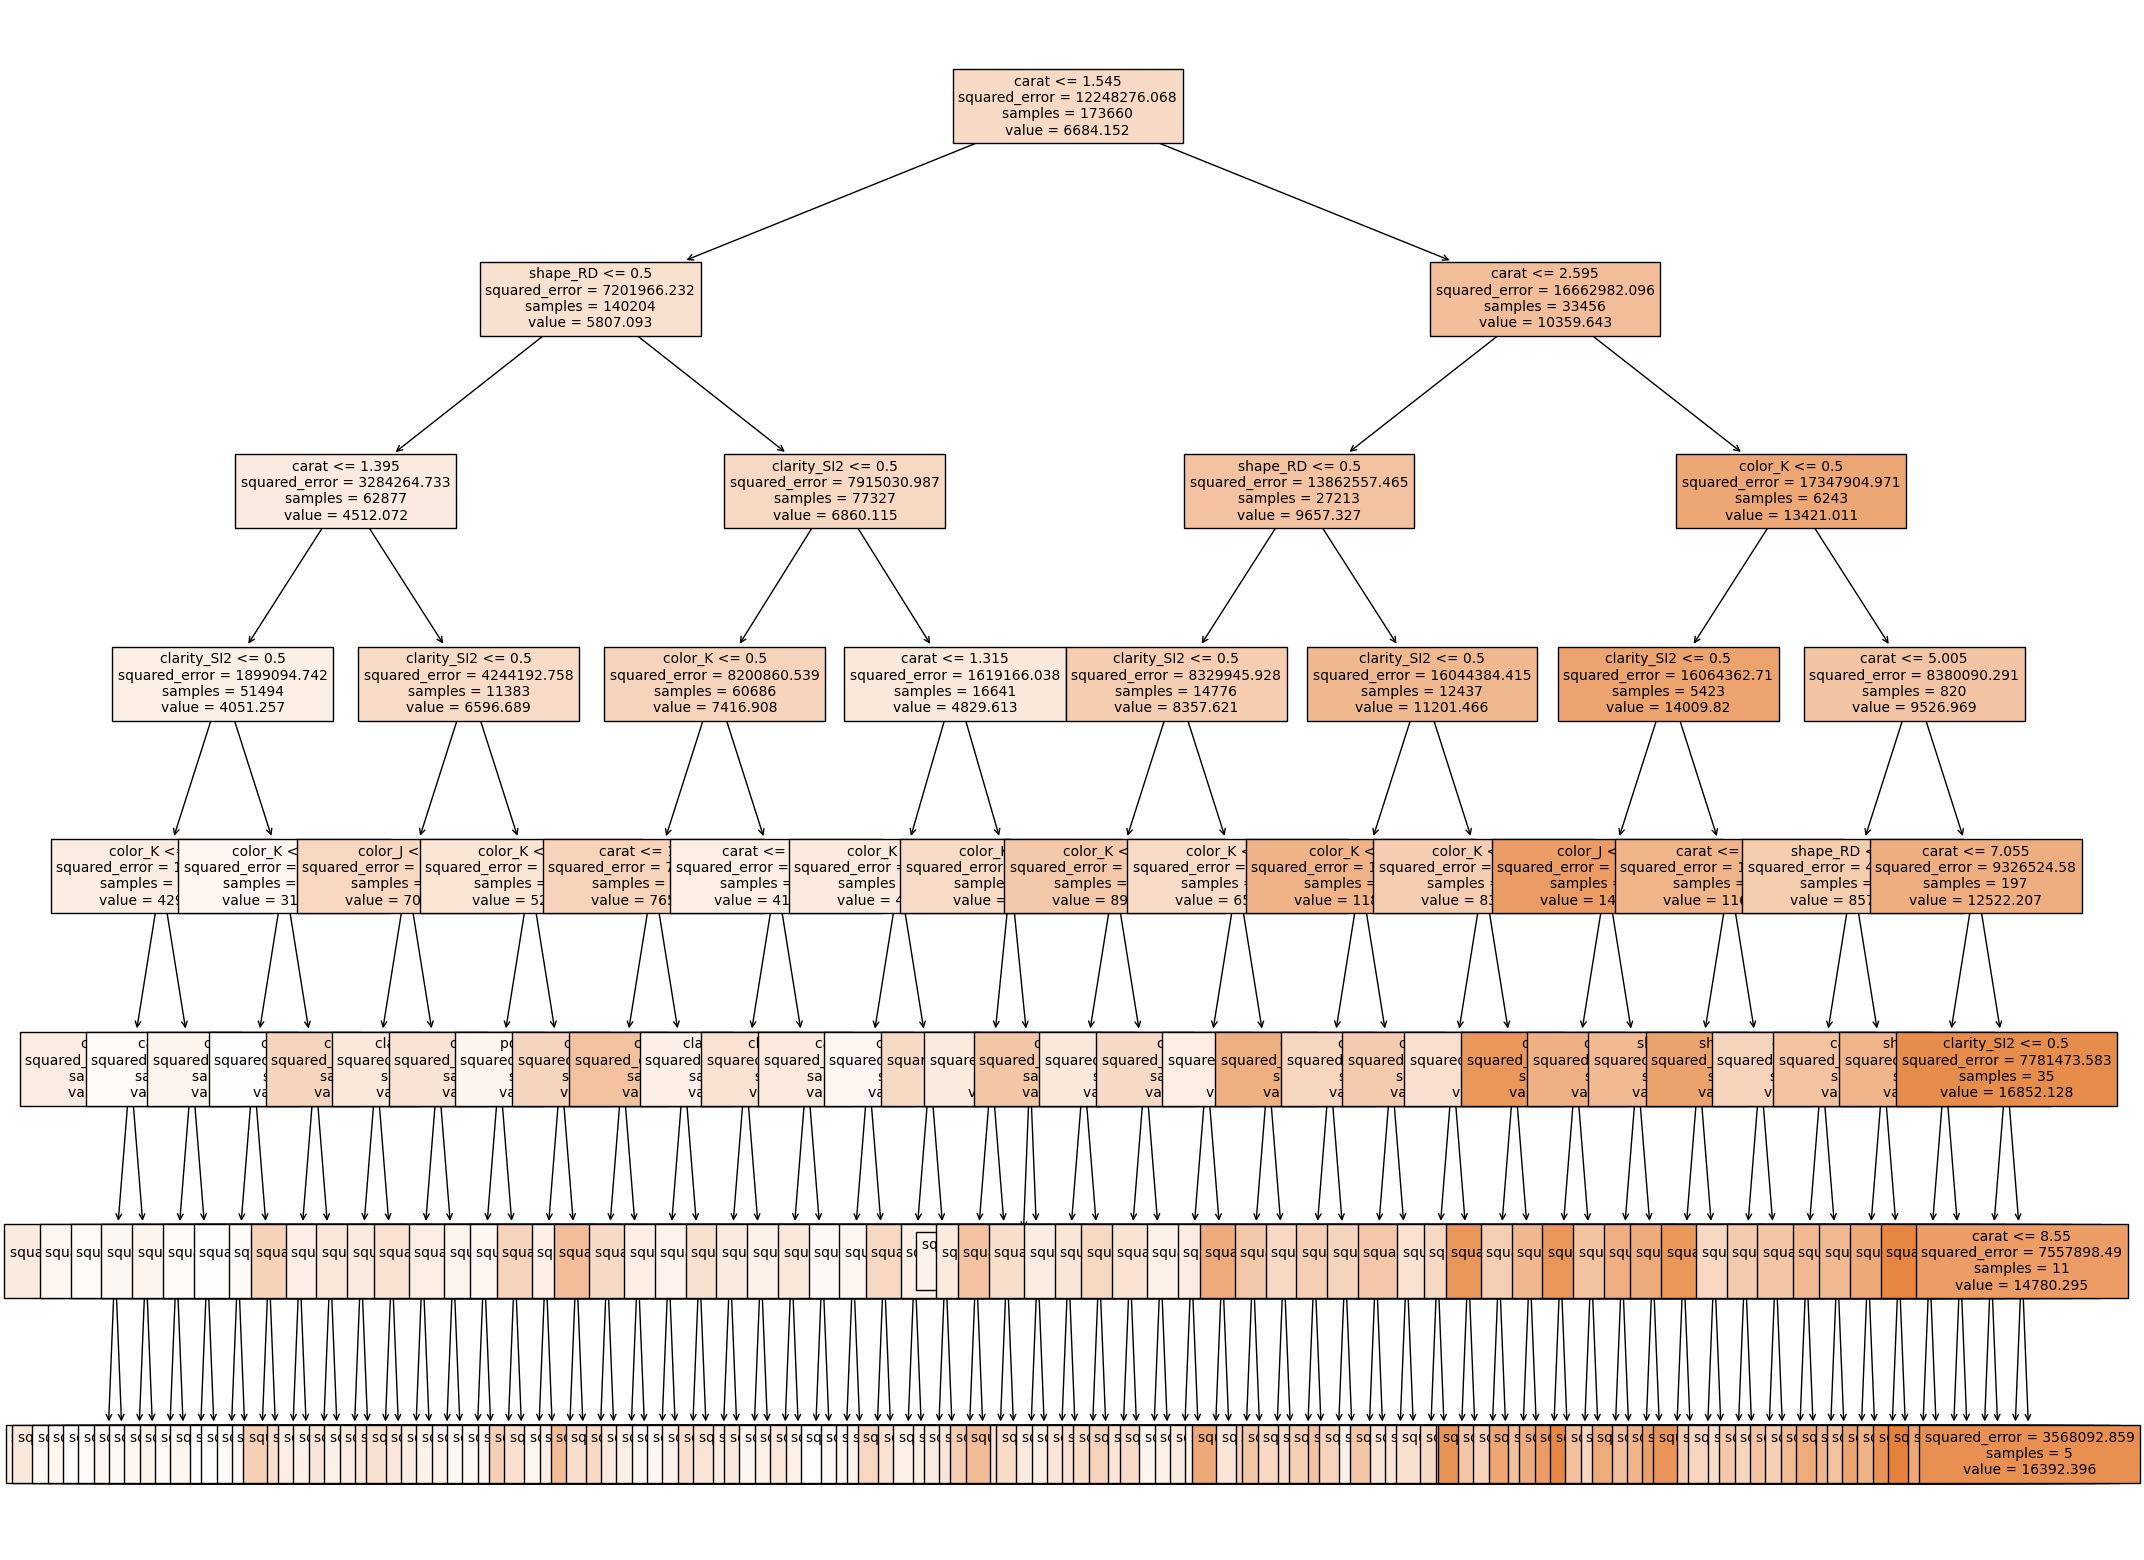

In [ ]:
# Нарисуем наше лучшее дерево из сетки
fig = plt.figure(figsize=(25,20))

_ = plot_tree(
        grid.best_estimator_,
        feature_names = X_train.columns,
        class_names = y_train.name,
        filled = True,
        fontsize = 10
    )

## Ансамблевые методы (2 балла)

Попробуйте выполнить ту же задачу, но используя ансамблевые методы (модель случайного леса).

In [ ]:
# Импортируем класс RandomForestRegressor из модуля ensemble библиотеки sklear
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Создадим объект класса RandomForestRegressor с параметрами по умолчанию
RFR = RandomForestRegressor()

# Обучим его на обучающей части датасета при помощи метода fit
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Получим предсказание нашего случайного леса при помощи метода predict на обучающем и тестовом датасете
y_RFR_train_predict = RFR.predict(X_train)
y_RFR_test_predict = RFR.predict(X_test)

In [ ]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
MAX_ERROR_RFR = round(max_error(y_test, y_RFR_test_predict), 2)
MAE_RFR = round(mean_absolute_error(y_test, y_RFR_test_predict), 2)
MSE_RFR = round(mean_squared_error(y_test, y_RFR_test_predict), 2)
RMSE_RFR = round(np.sqrt(mean_squared_error(y_test, y_RFR_test_predict)), 2)
R2_RFR = round(r2_score(y_test, y_RFR_test_predict), 4)
MAPE_RFR = round(mean_absolute_percentage_error(y_test, y_RFR_test_predict), 4)

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_RFR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_RFR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {MAX_ERROR_RFR}")
print(f"MAE:       {MAE_RFR}")
print(f"MSE:       {MSE_RFR}")
print(f"RMSE:      {RMSE_RFR}")
print(f"R2:        {R2_RFR}")
print(f"MAPE:      {MAPE_RFR}")

TRAIN
MAX ERROR: 7497.061028388959
MAE:       312.11315798936704
TEST
MAX ERROR: 12119.16
MAE:       457.57
MSE:       484590.19
RMSE:      696.13
R2:        0.9607
MAPE:      0.0748


In [ ]:
# Импортируем GridSearchCV из модуля model_selection библиотеки sklearn
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем mean_absolute_error

grid = RandomizedSearchCV(
            RandomForestRegressor(),                # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(6, 20),
                'min_samples_split': range(2, 9),
                'max_features': range(2, 11)
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться (Почему "neg_..."?)
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=16,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=16,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(6, 20),
                                        'max_features': range(2, 11),
                                        'min_samples_split': range(2, 9)},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [ ]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid.best_score_}")
print(f"Лучшие параметры: {grid.best_params_}")

Лучшая метрика:   -590.2039916581224
Лучшие параметры: {'min_samples_split': 8, 'max_features': 9, 'max_depth': 18}


In [ ]:
# Получим предсказание нашего лучшего дерева (хранится в best_estimator_) при помощи метода predict на обучающем и тестовом датасете
y_RGS_train_predict = grid.best_estimator_.predict(X_train)
y_RGS_test_predict = grid.best_estimator_.predict(X_test)

In [ ]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
MAX_ERROR_RGS = round(max_error(y_test, y_RGS_test_predict), 2)
MAE_RGS = round(mean_absolute_error(y_test, y_RGS_test_predict), 2)
MSE_RGS = round(mean_squared_error(y_test, y_RGS_test_predict), 2)
RMSE_RGS = round(np.sqrt(mean_squared_error(y_test, y_RGS_test_predict)), 2)
R2_RGS = round(r2_score(y_test, y_RGS_test_predict), 4)
MAPE_RGS = round(mean_absolute_percentage_error(y_test, y_RGS_test_predict), 4)

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_RGS_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_RGS_train_predict)}")

print("TEST")
print(f"MAX ERROR: {MAX_ERROR_RGS}")
print(f"MAE:       {MAE_RGS}")
print(f"MSE:       {MSE_RGS}")
print(f"RMSE:      {RMSE_RGS}")
print(f"R2:        {R2_RGS}")
print(f"MAPE:      {MAPE_RGS}")

TRAIN
MAX ERROR: 11884.758368770805
MAE:       542.2776697410999
TEST
MAX ERROR: 11712.43
MAE:       592.34
MSE:       803579.93
RMSE:      896.43
R2:        0.9348
MAPE:      0.0934


## Заключение (0.5 баллов)

Сравните все модели, выберите лучшую и сделайте вывод о проекте в целом.

In [ ]:
comp_algs = ['LR', 'KNN', 'DTR', 'DTR GridSearchCV', 'RFR', 'RFR RandomizedSearchCV']
#comp_columns = ['MSE', 'MAE', 'RMSE' 'MAX_ERROR', 'R2', 'MAPE']
#comp = pd.DataFrame(columns=comp_columns, index=comp_algs)

In [ ]:
data = [{'MAX Err': MAX_ERROR_lr,  'MAE': MAE_lr,  'MSE': MSE_lr,  'RMSE': RMSE_lr,  'R2': R2_lr,  'MAPE': MAPE_lr},
        {'MAX Err': MAX_ERROR_knn, 'MAE': MAE_knn, 'MSE': MSE_knn, 'RMSE': RMSE_knn, 'R2': R2_knn, 'MAPE': MAPE_knn},
        {'MAX Err': MAX_ERROR_DTR, 'MAE': MAE_DTR, 'MSE': MSE_DTR, 'RMSE': RMSE_DTR, 'R2': R2_DTR, 'MAPE': MAPE_DTR},
        {'MAX Err': MAX_ERROR_GS,  'MAE': MAE_GS,  'MSE': MSE_GS,  'RMSE': RMSE_GS,  'R2': R2_GS,  'MAPE': MAPE_GS},
        {'MAX Err': MAX_ERROR_RFR, 'MAE': MAE_RFR, 'MSE': MSE_RFR, 'RMSE': RMSE_RFR, 'R2': R2_RFR, 'MAPE': MAPE_RFR},
        {'MAX Err': MAX_ERROR_RGS, 'MAE': MAE_RGS, 'MSE': MSE_RGS, 'RMSE': RMSE_RGS, 'R2': R2_RGS, 'MAPE': MAPE_RGS}]
comp = pd.DataFrame(data=data, index=comp_algs)

In [ ]:
# таблица сравнения метрик алгоритмов
comp

,MAX Err,MAE,MSE,RMSE,R2,MAPE
LR,21847.08,1031.80,2147139.10,1465.31,0.8257,0.1792
KNN,13208.42,617.66,961287.09,980.45,0.9220,0.1015
DTR,12930.92,1325.19,3706581.19,1925.25,0.6991,0.2113
DTR GridSearchCV,12930.92,1325.22,3706718.48,1925.28,0.6991,0.2113
RFR,12119.16,457.57,484590.19,696.13,0.9607,0.0748
RFR RandomizedSearchCV,11712.43,592.34,803579.93,896.43,0.9348,0.0934


Вывод: лучшая модель - RFR


Ассистент:

Очистка: 1.7 / 2 (не посчитали новую цену с учетом инфляции)

Сравнения и KNN: 1.3 / 1.5 (не нормализованы данные)

ДР: 2 / 2

АМ: 2 / 2

Заключение:  0.4 / 0.5 (я бы добавил возможную причину, по которой RF - лучшая модель (может работать с ненормализованными данными)

Бонус: 2 / 2

Фидбэк: одна из самых лучших работ, которую удобно просматривать и проверять, все кодировки подкреплены рассуждениями, достаточно визуализации. Вы - большие молодцы!   